In [94]:
import numpy as np
import pandas as pd
emotion = pd.read_csv("../data/各品类每日代理指数.csv",encoding='utf-8',index_col='销售日期')
price = pd.read_csv("../data/各品类每日单价.csv",encoding='utf-8',index_col='销售日期')

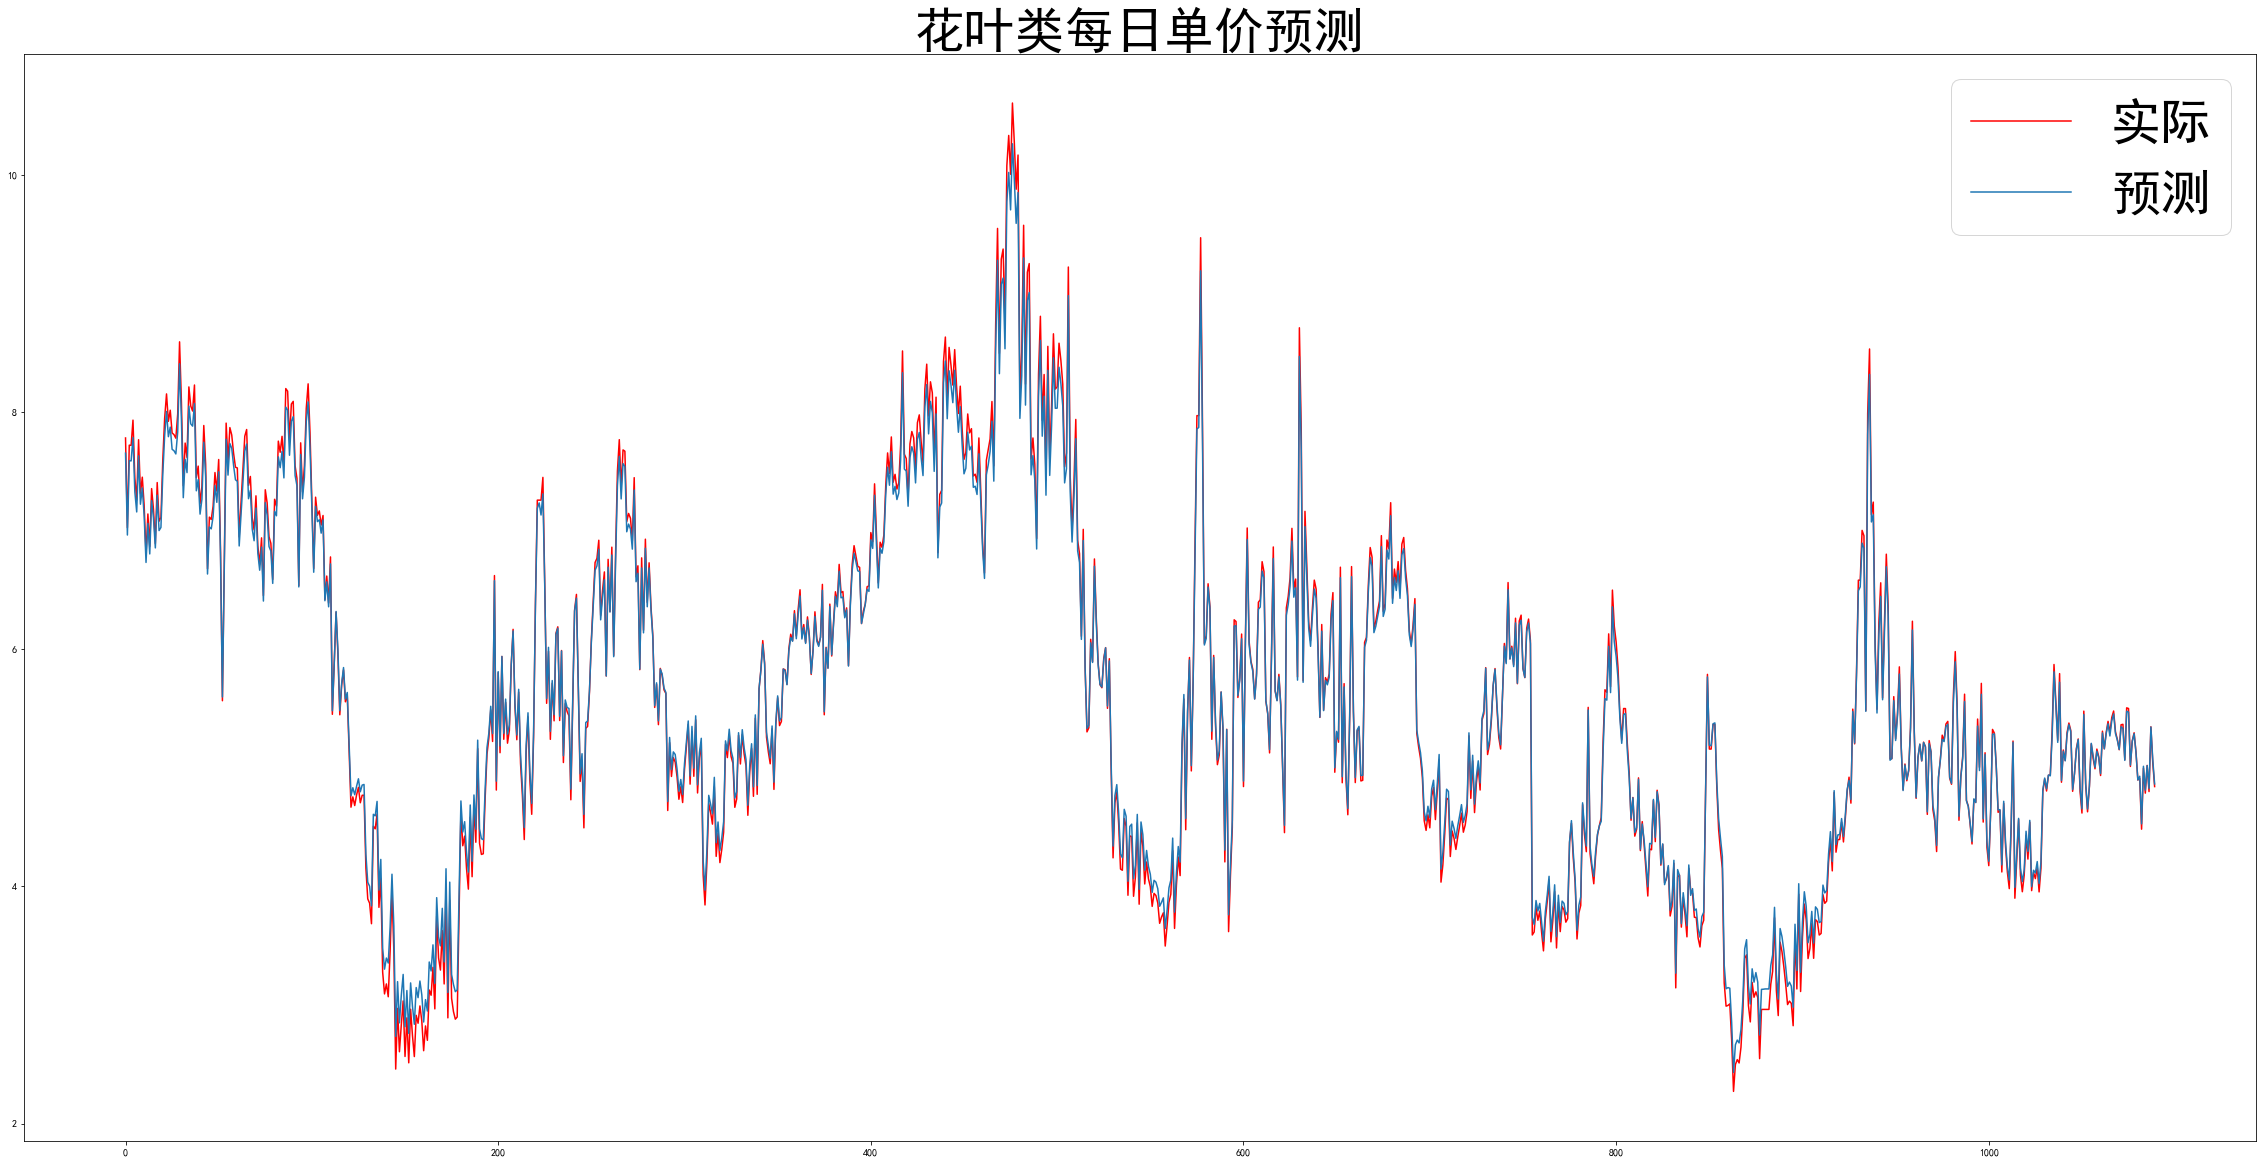

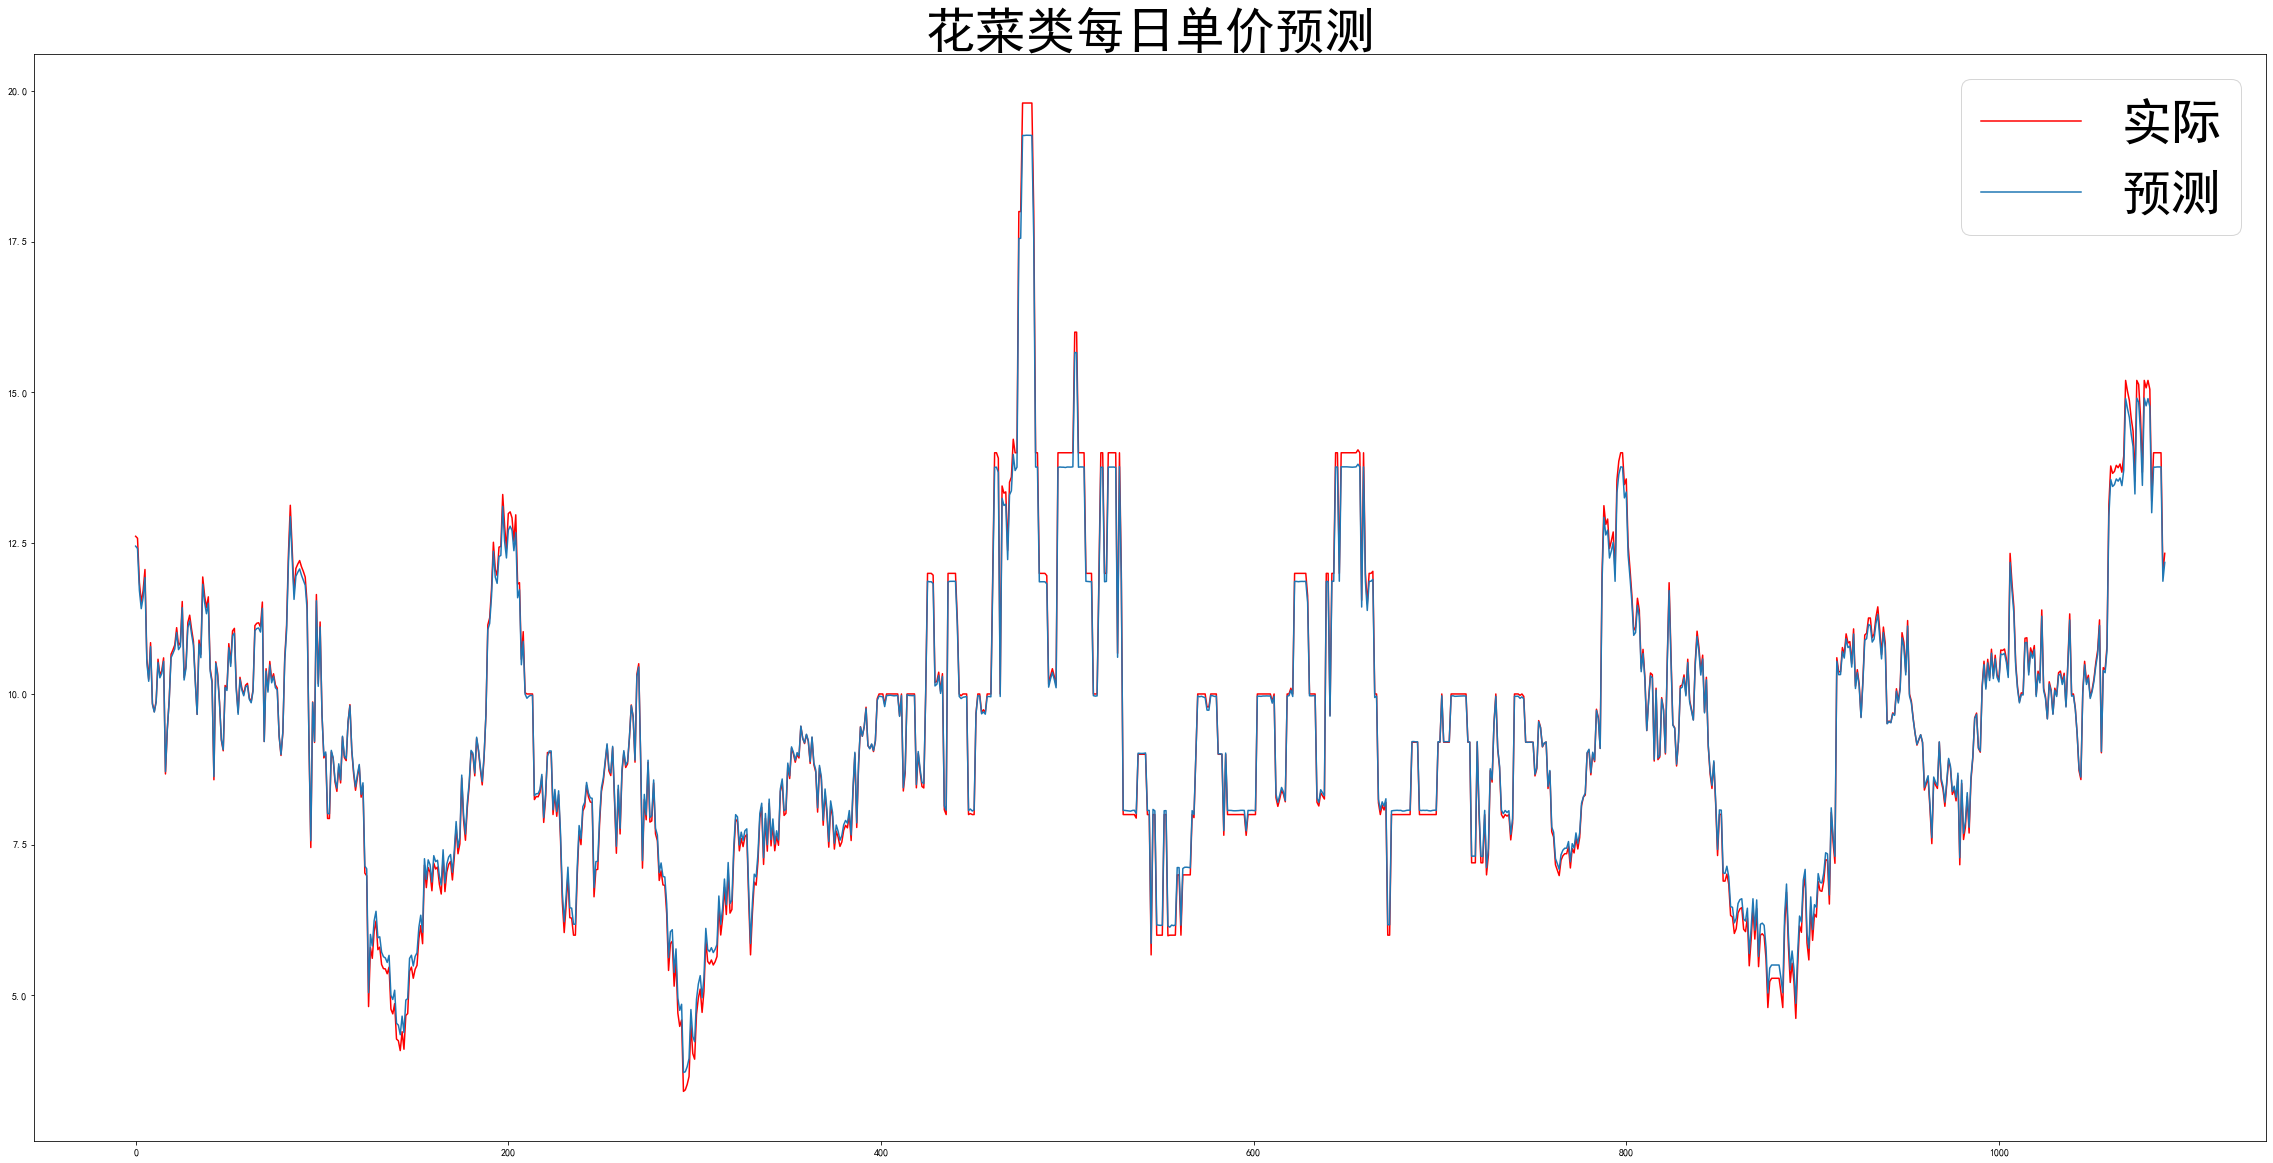

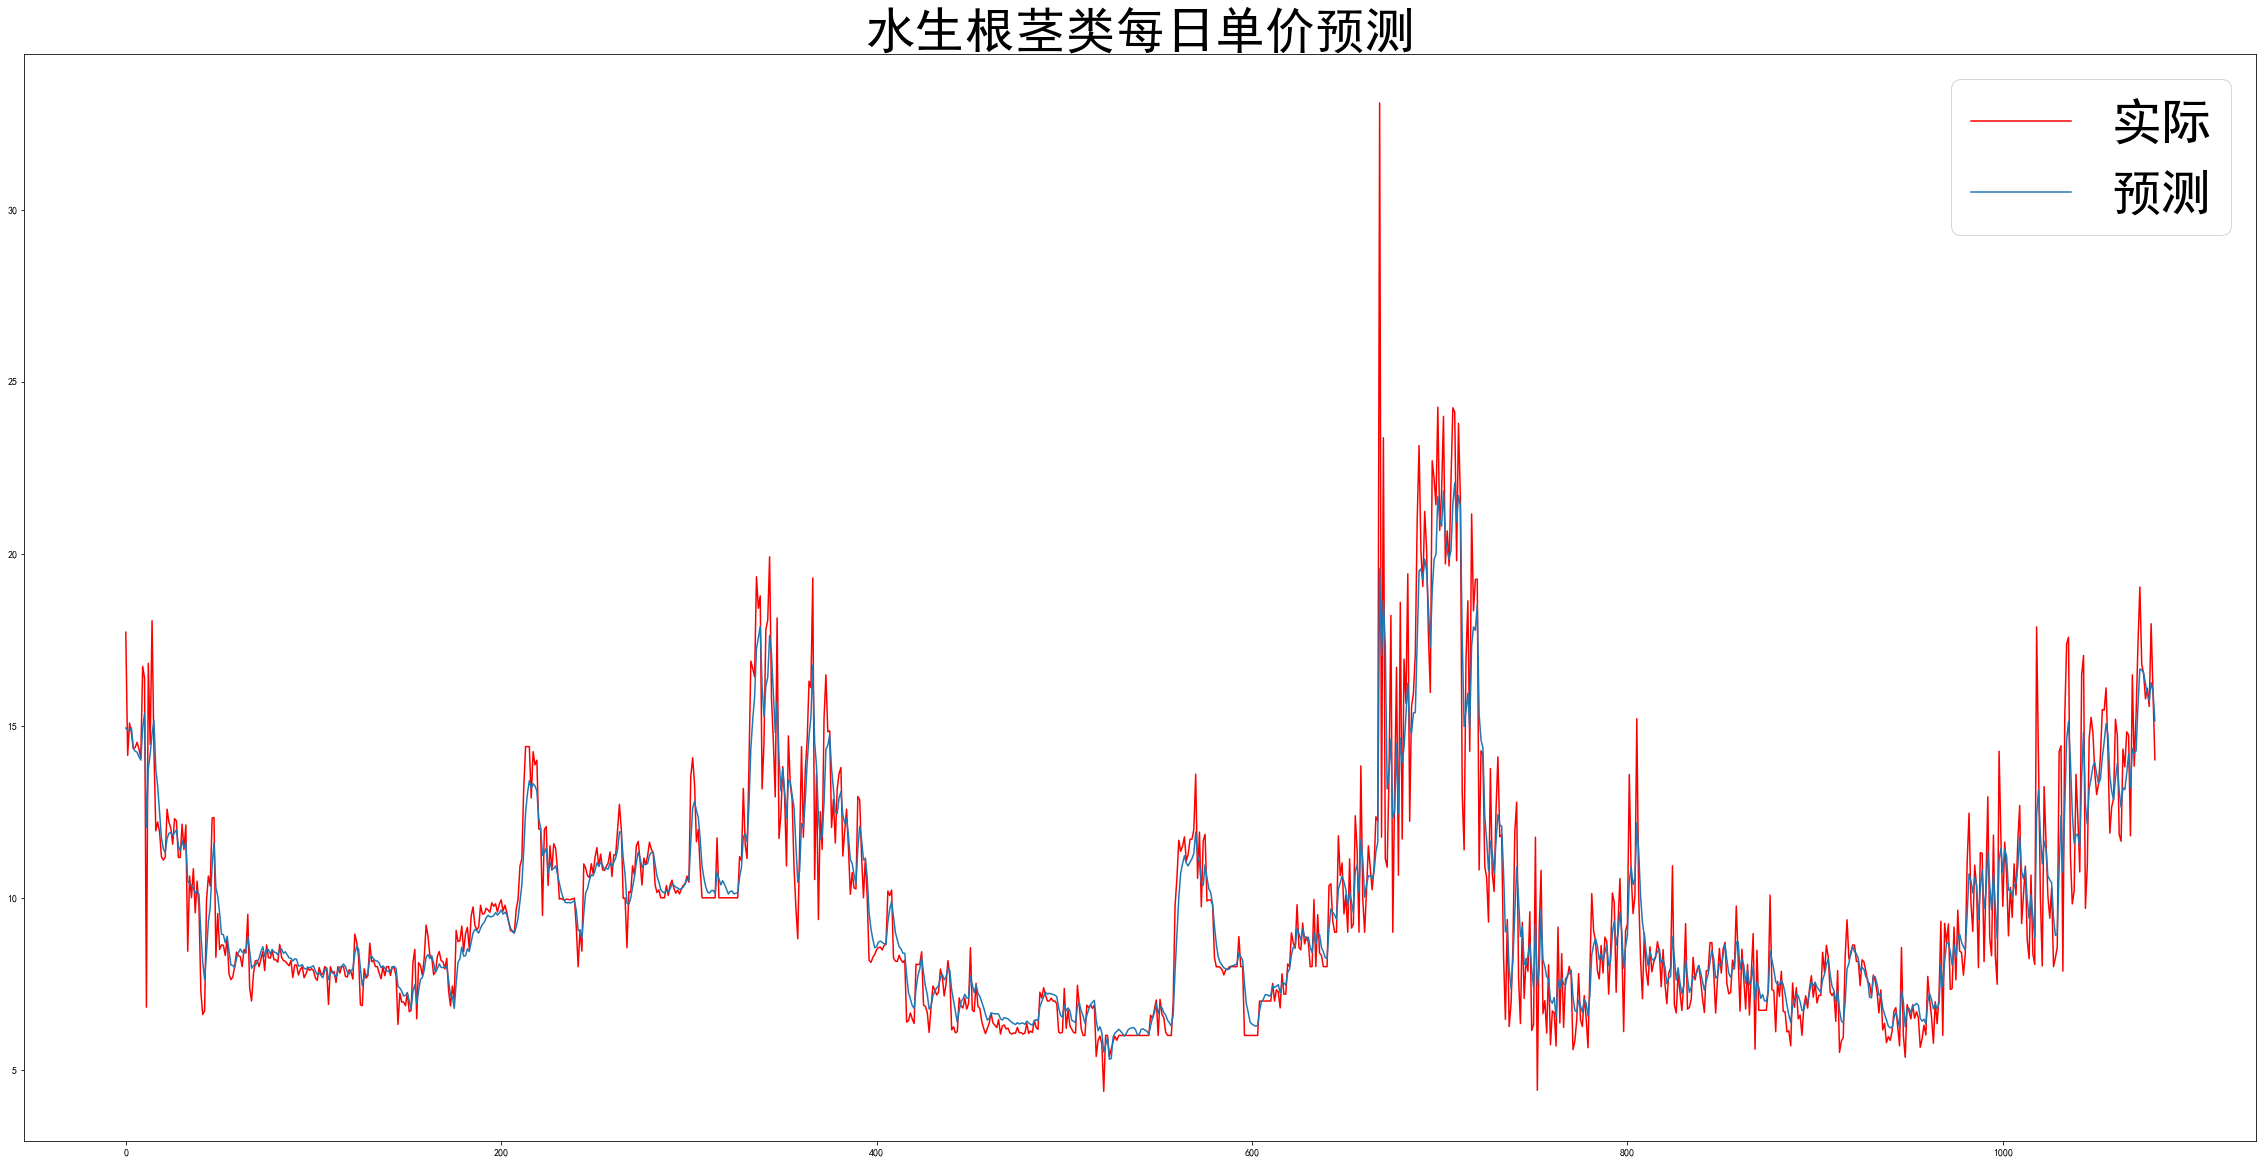

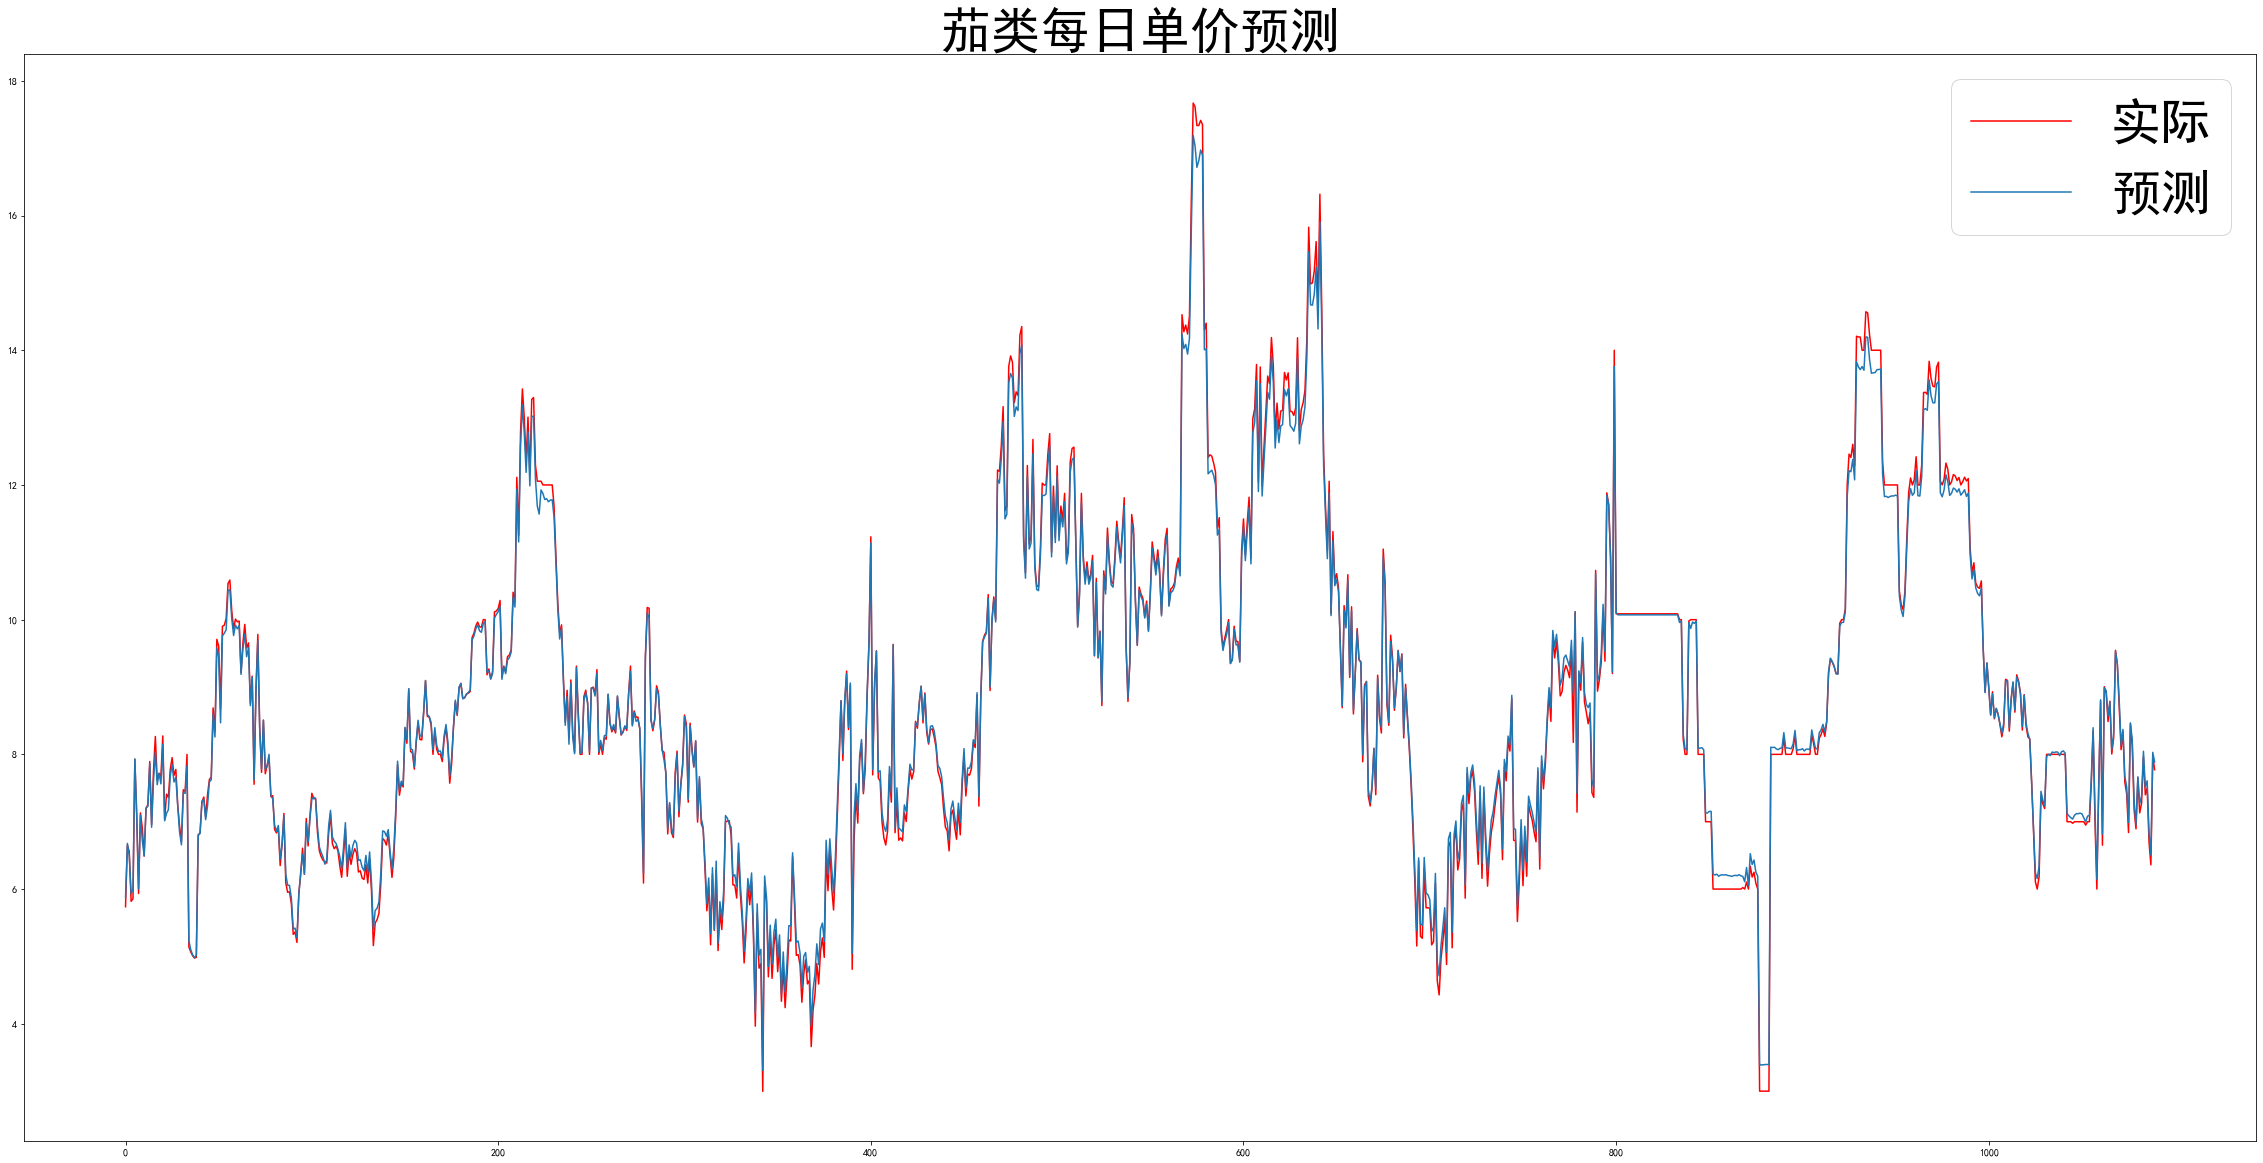

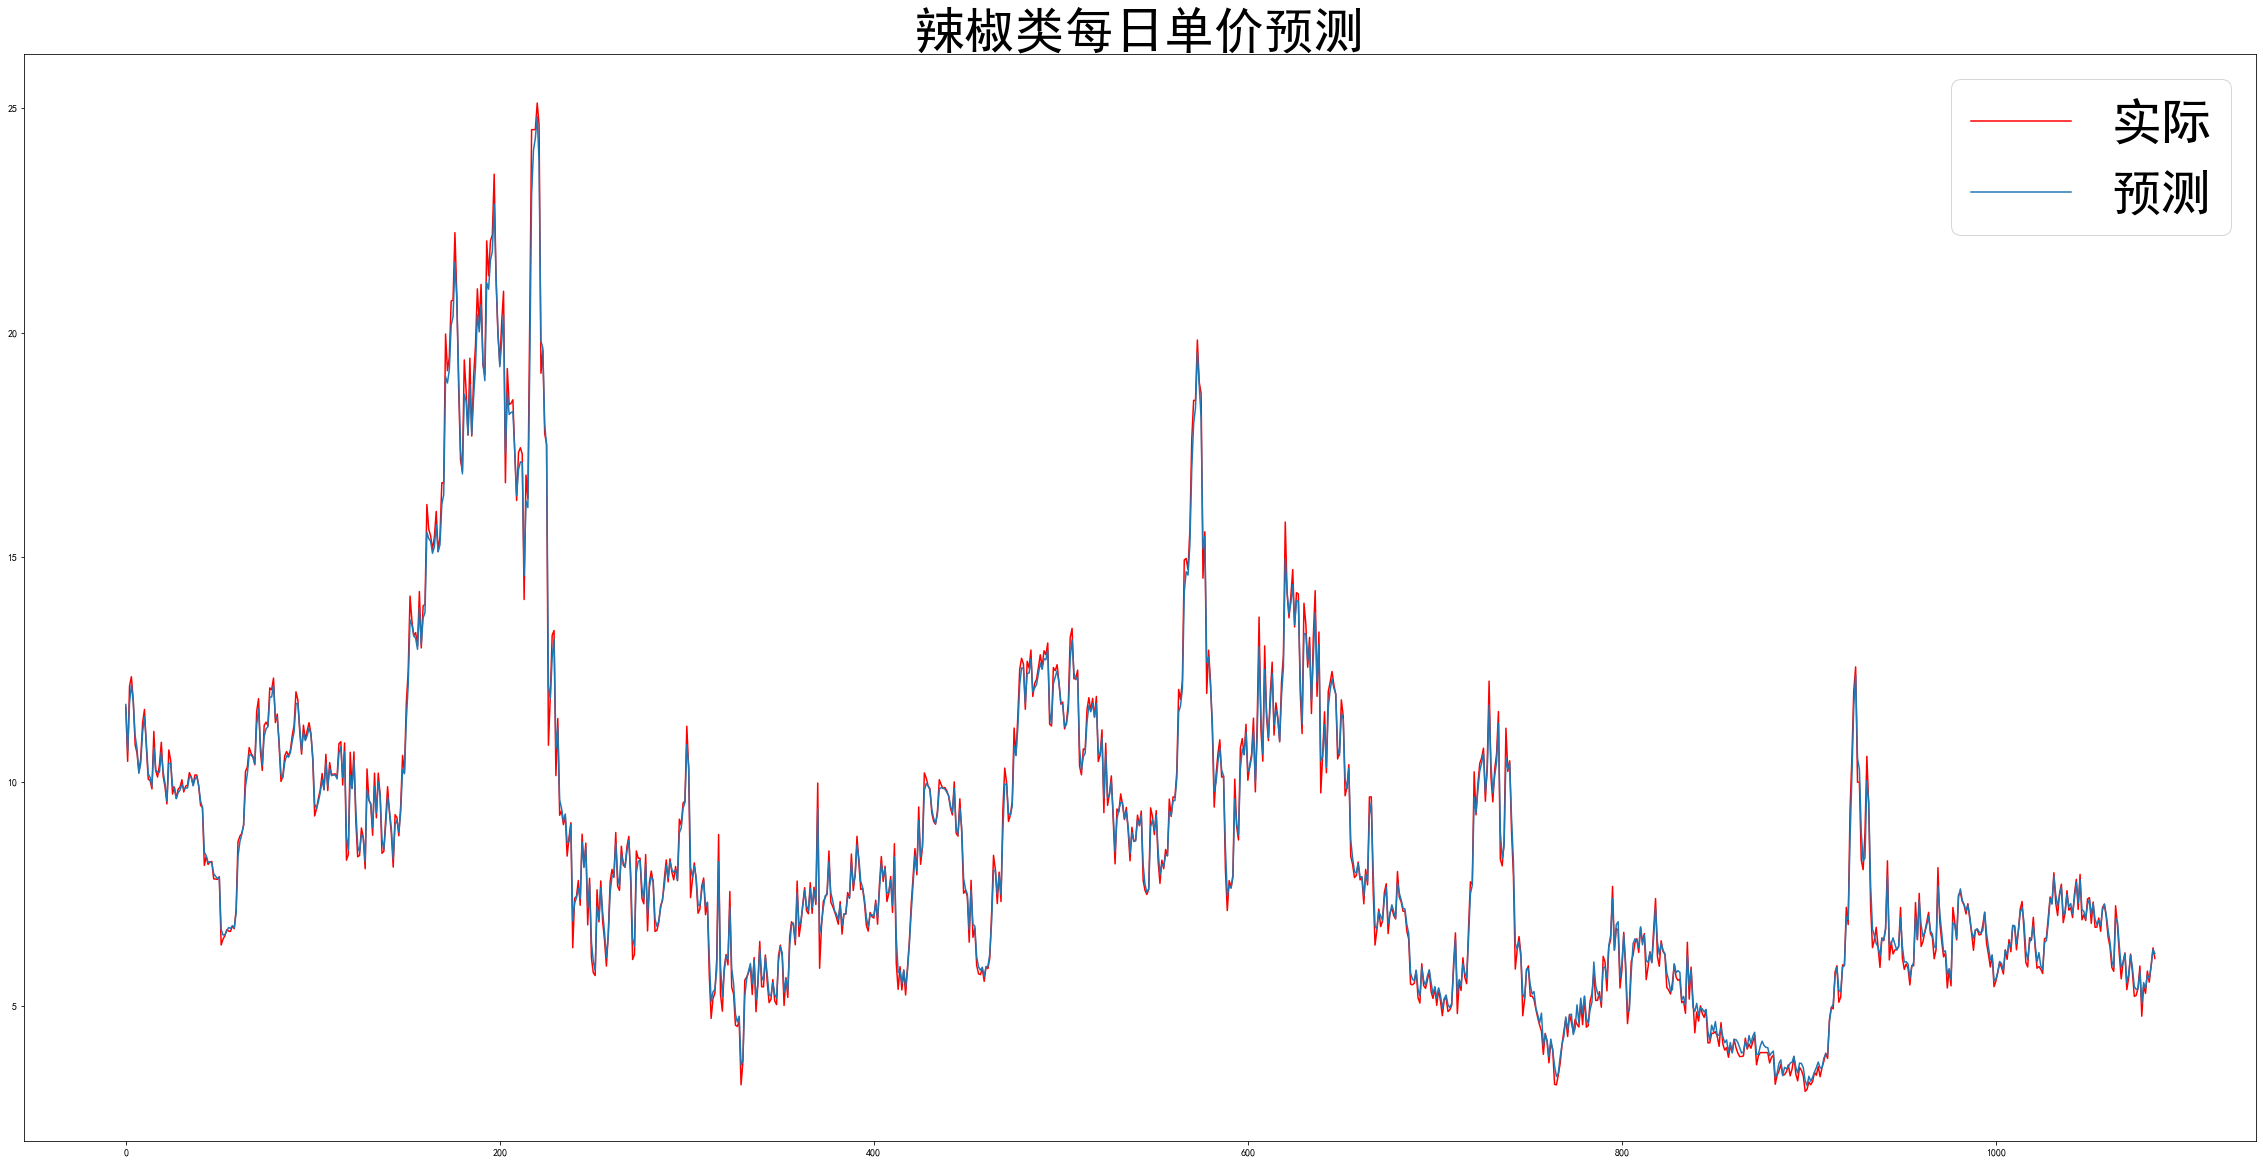

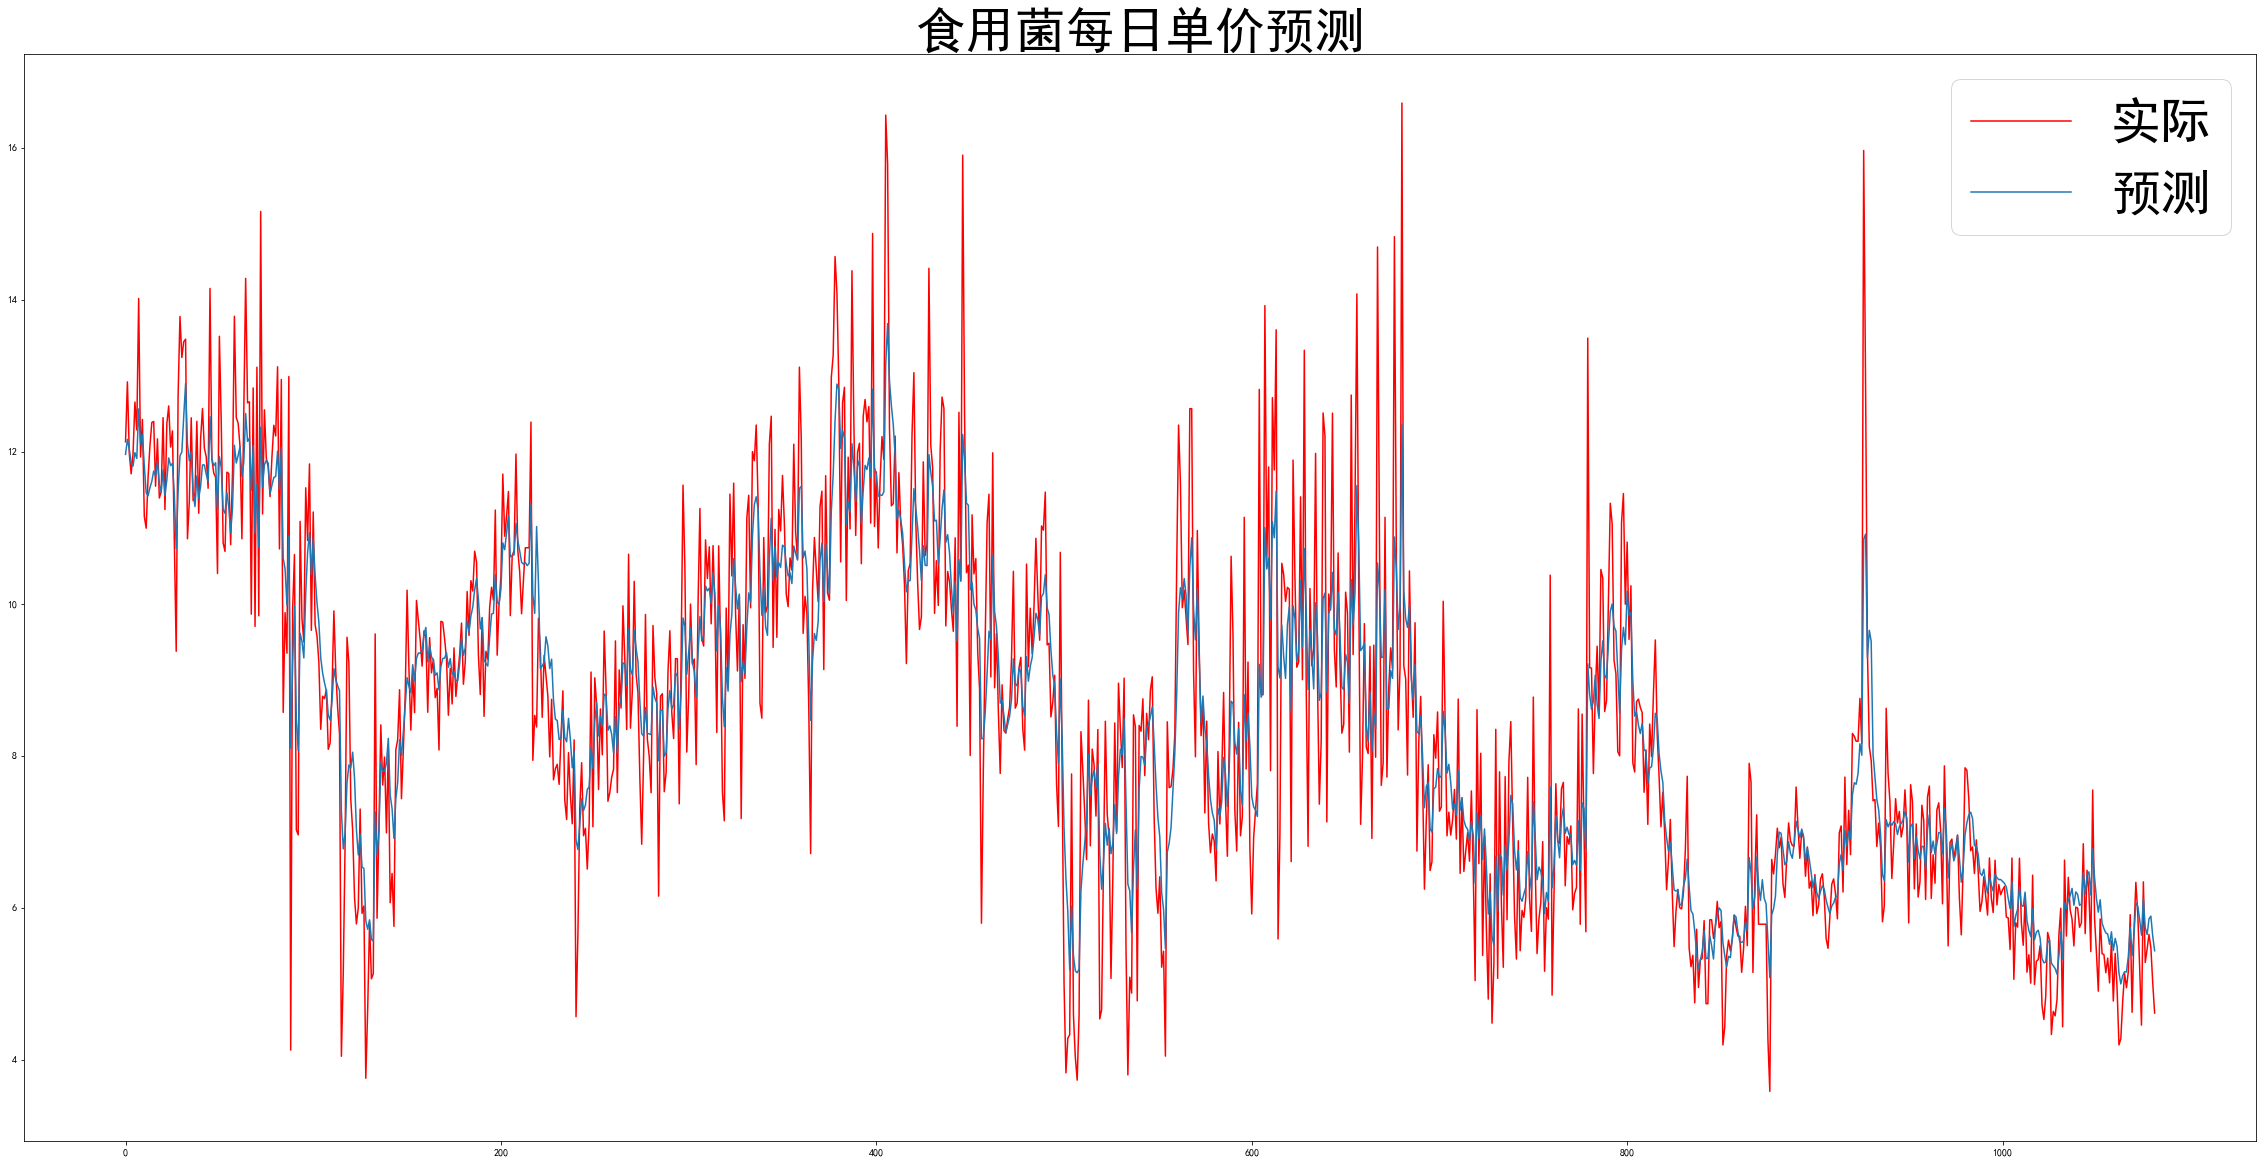

In [95]:
LAG = pd.DataFrame(data = [1,1,5,1,3,5], index =  ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌'] , columns=['lag'])
from statsmodels.tsa.api import VAR
for types in ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']:
    maxlags = LAG.loc[types]['lag']
    VAR_data = []
    VAR_data.append(emotion[types].values[:-maxlags])
    VAR_data.append(price[types].values[maxlags:])
    VAR_data = pd.DataFrame(VAR_data).T
    #print(VAR_data)
    model = VAR(VAR_data)

    results = model.fit(maxlags=maxlags, ic='aic')
    results.summary()


    import matplotlib.pyplot as plt
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    lag_order = results.k_ar
    y1 = []
    y2 = []
    count = 0
    n,m = VAR_data.shape
    # 用i枚举每一天
    for i in range(n-maxlags-1):
        # 制作输入
        forecast_input = VAR_data.values[i:i+maxlags]
        # 往前预测一天
        forecast = results.forecast(forecast_input, steps=1)
        # 将预测结果加入数组中
        y1.append(forecast[0][1])
        # y2中存储的原本的值
        y2.append(VAR_data.values[i+maxlags+1][1])
        # 将两者和阈值进行比较
        if abs(forecast[0][1]-VAR_data.values[i+maxlags+1][1]) < 0.17*1e9:
            count +=1

    # 输出正确率
    #print(count/(n-maxlags))
    plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
    plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
    fig = plt.figure(figsize=(40,20))
    # 手动对齐
    plt.title(types+'每日单价预测',fontsize = 50)
    plt.plot(y2[:-2],'r', label = '实际')
    plt.plot(y1[2:],label = '预测')
    plt.legend(fontsize = 50)
    plt.savefig('../data/preLineCharts/'+types+'每日单价预测'+'.jpg')
    plt.show()


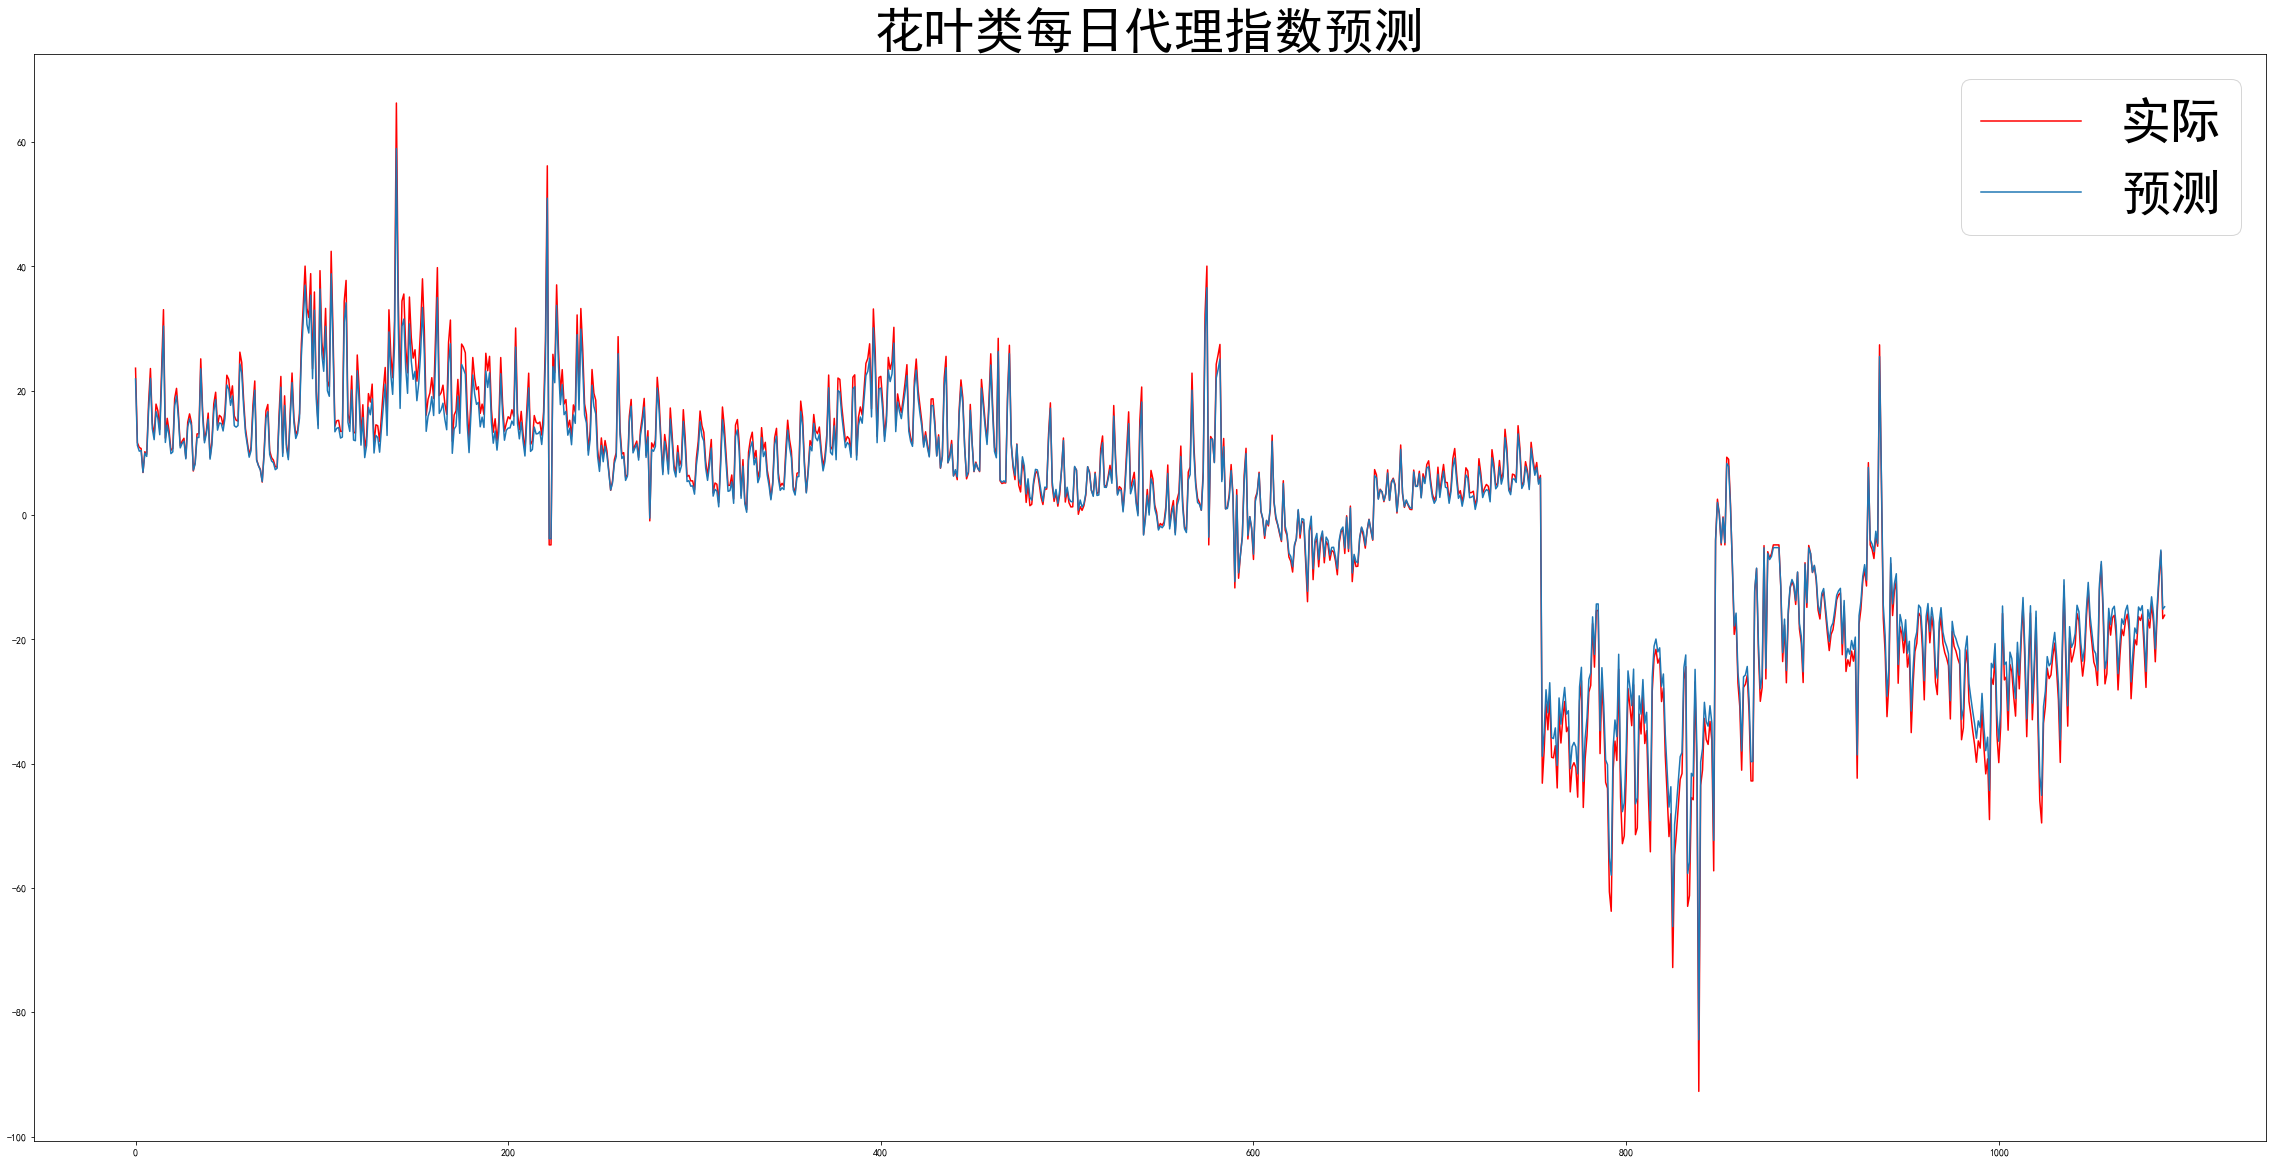

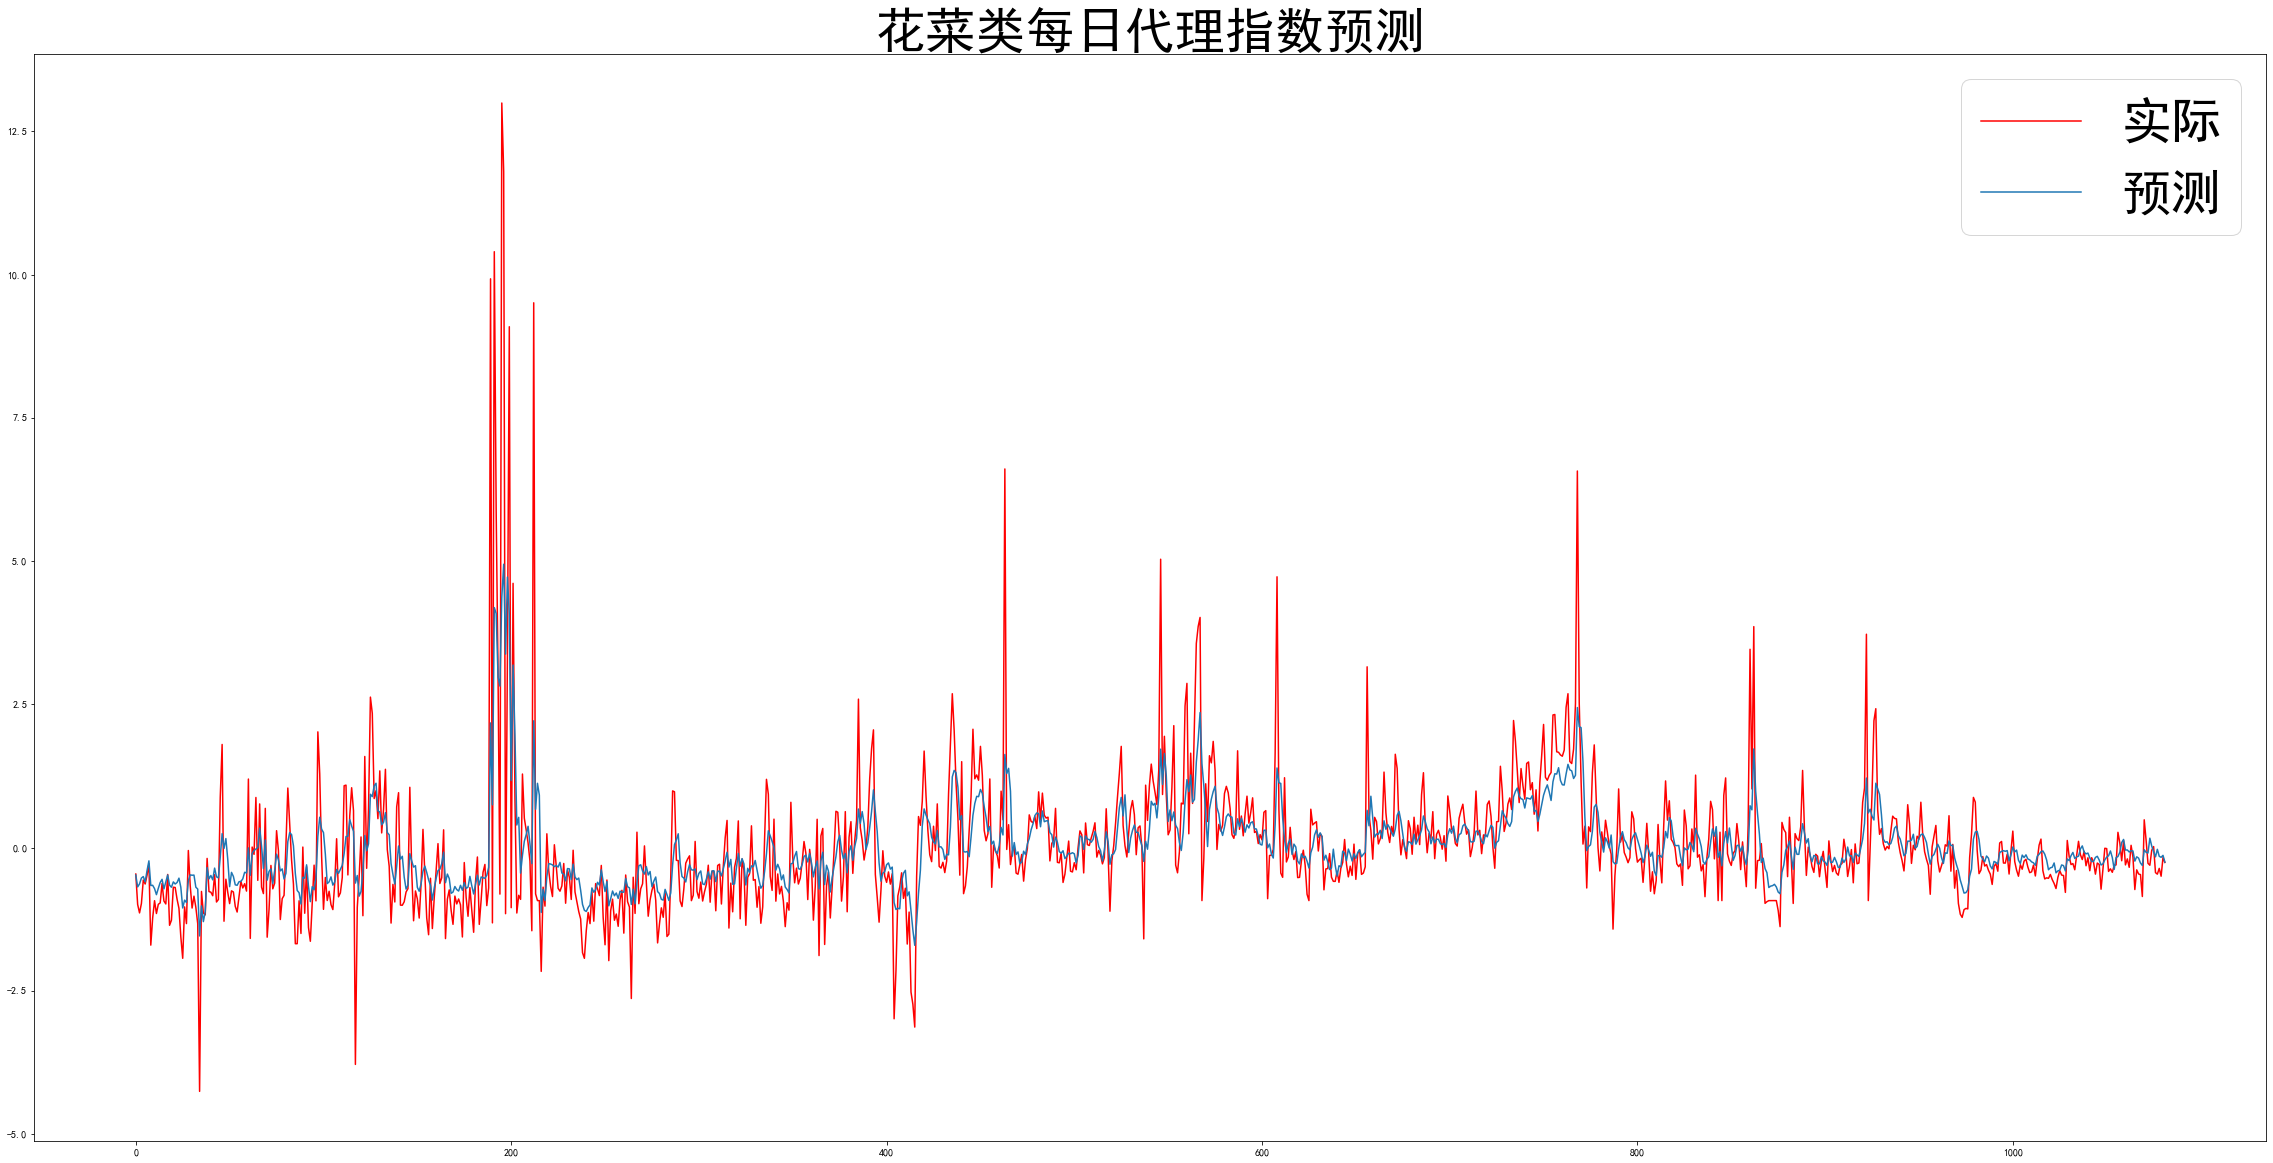

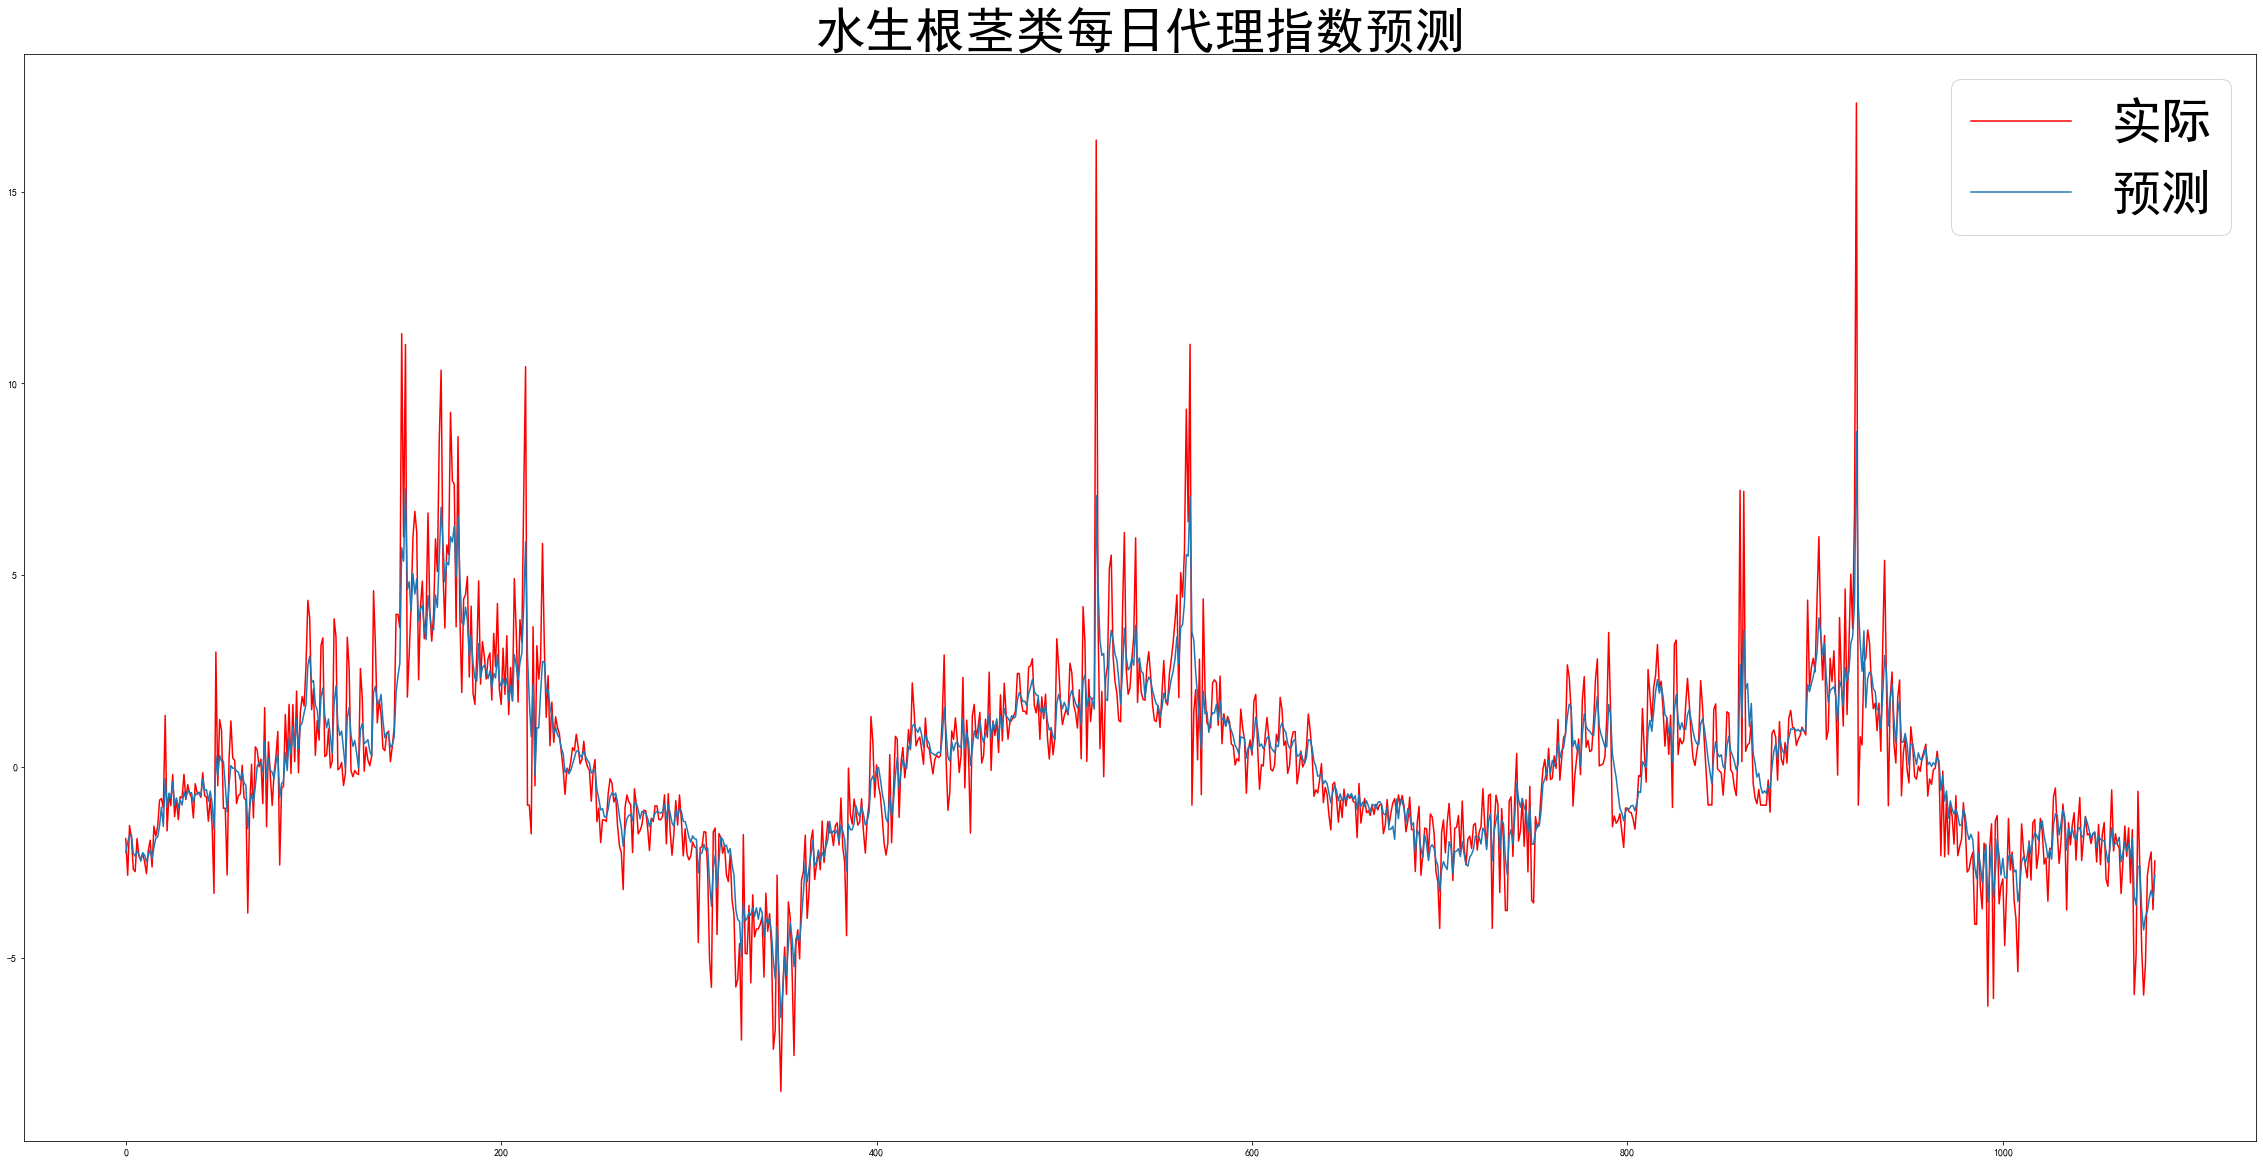

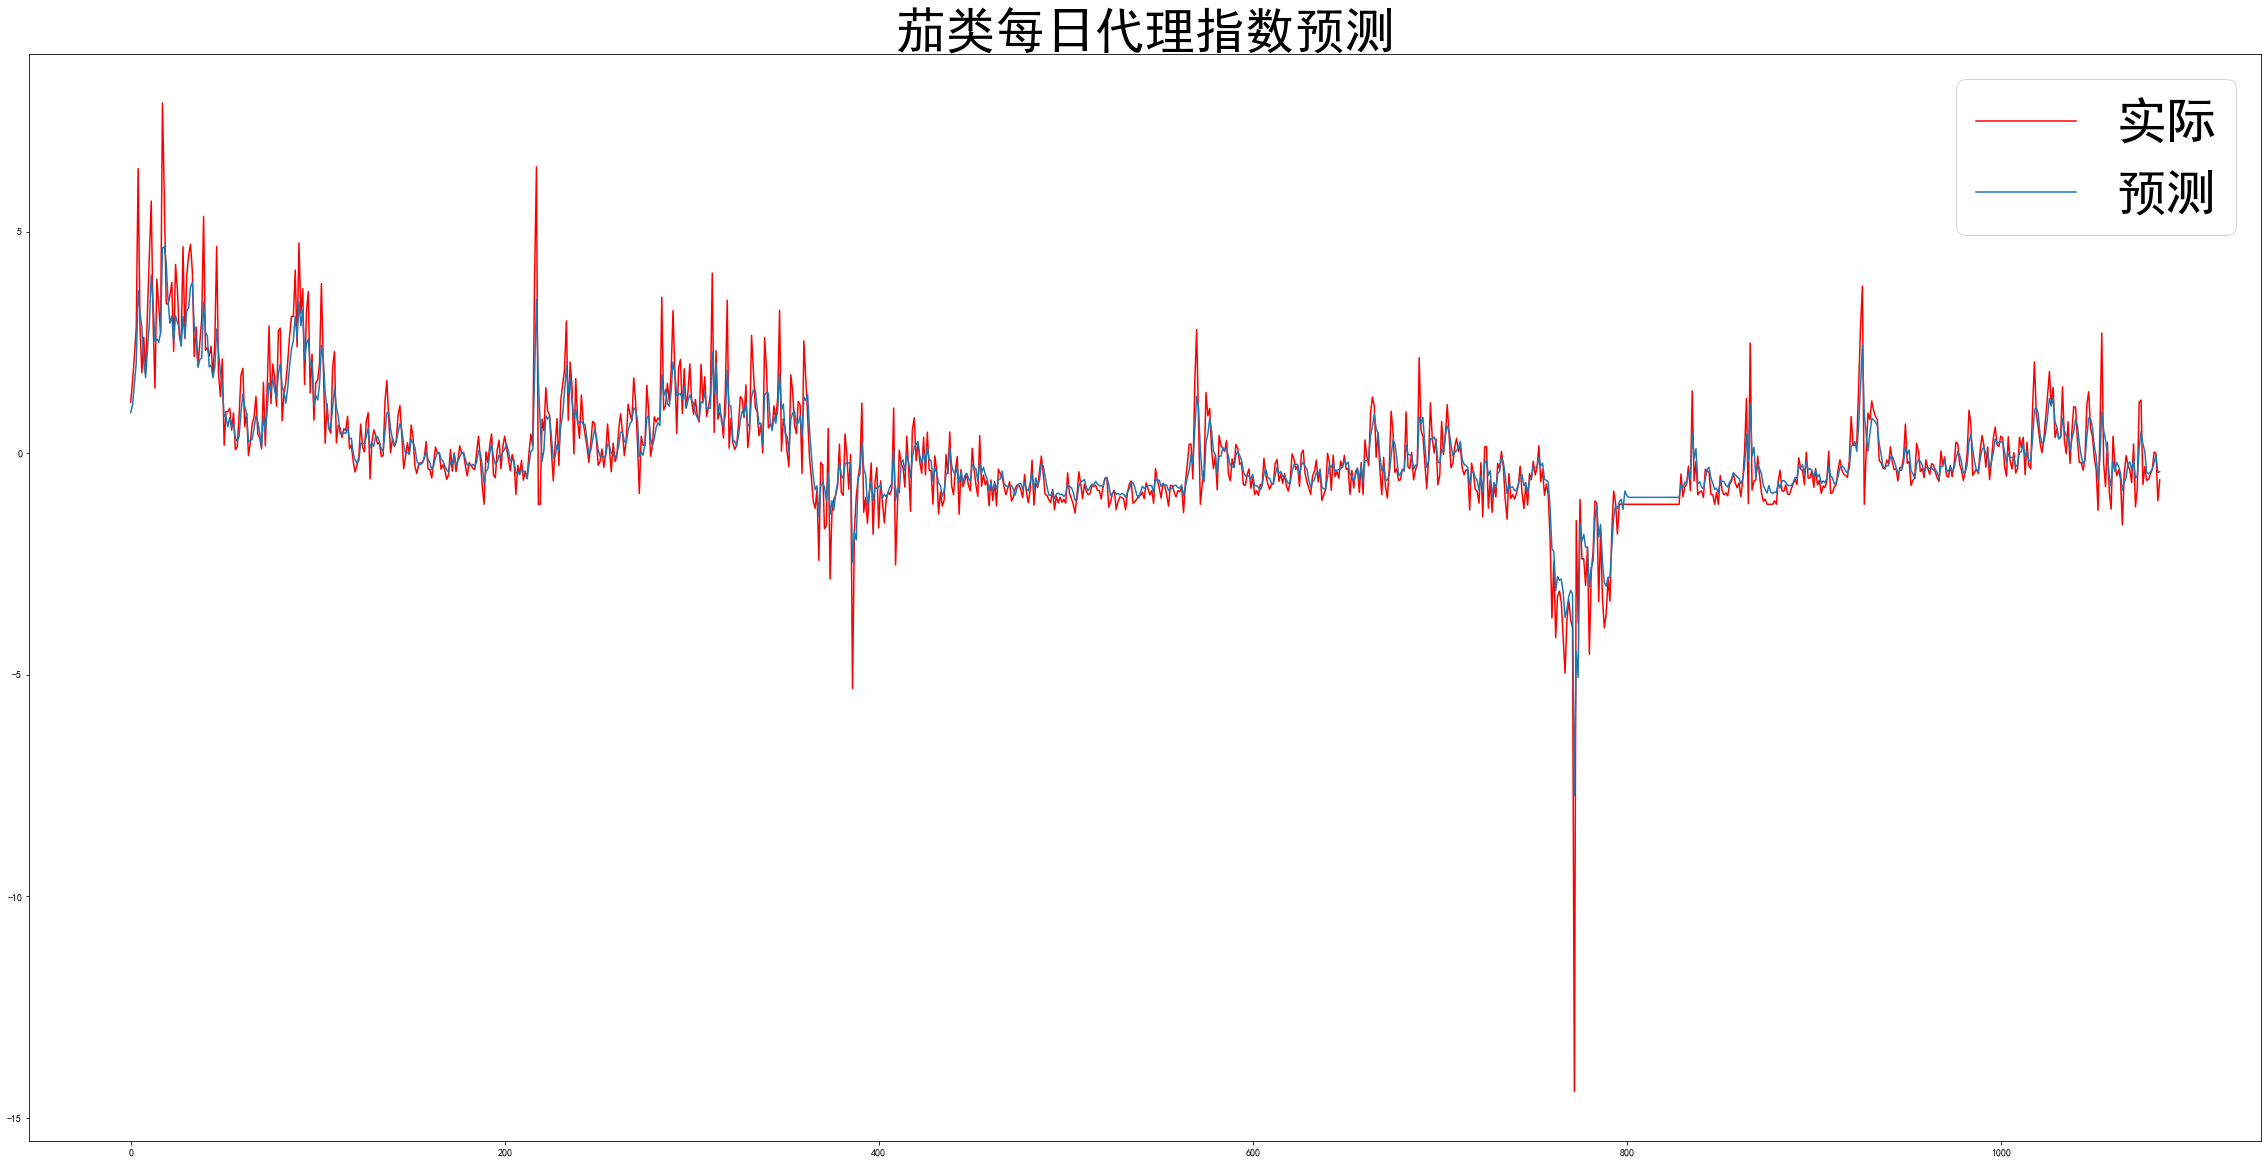

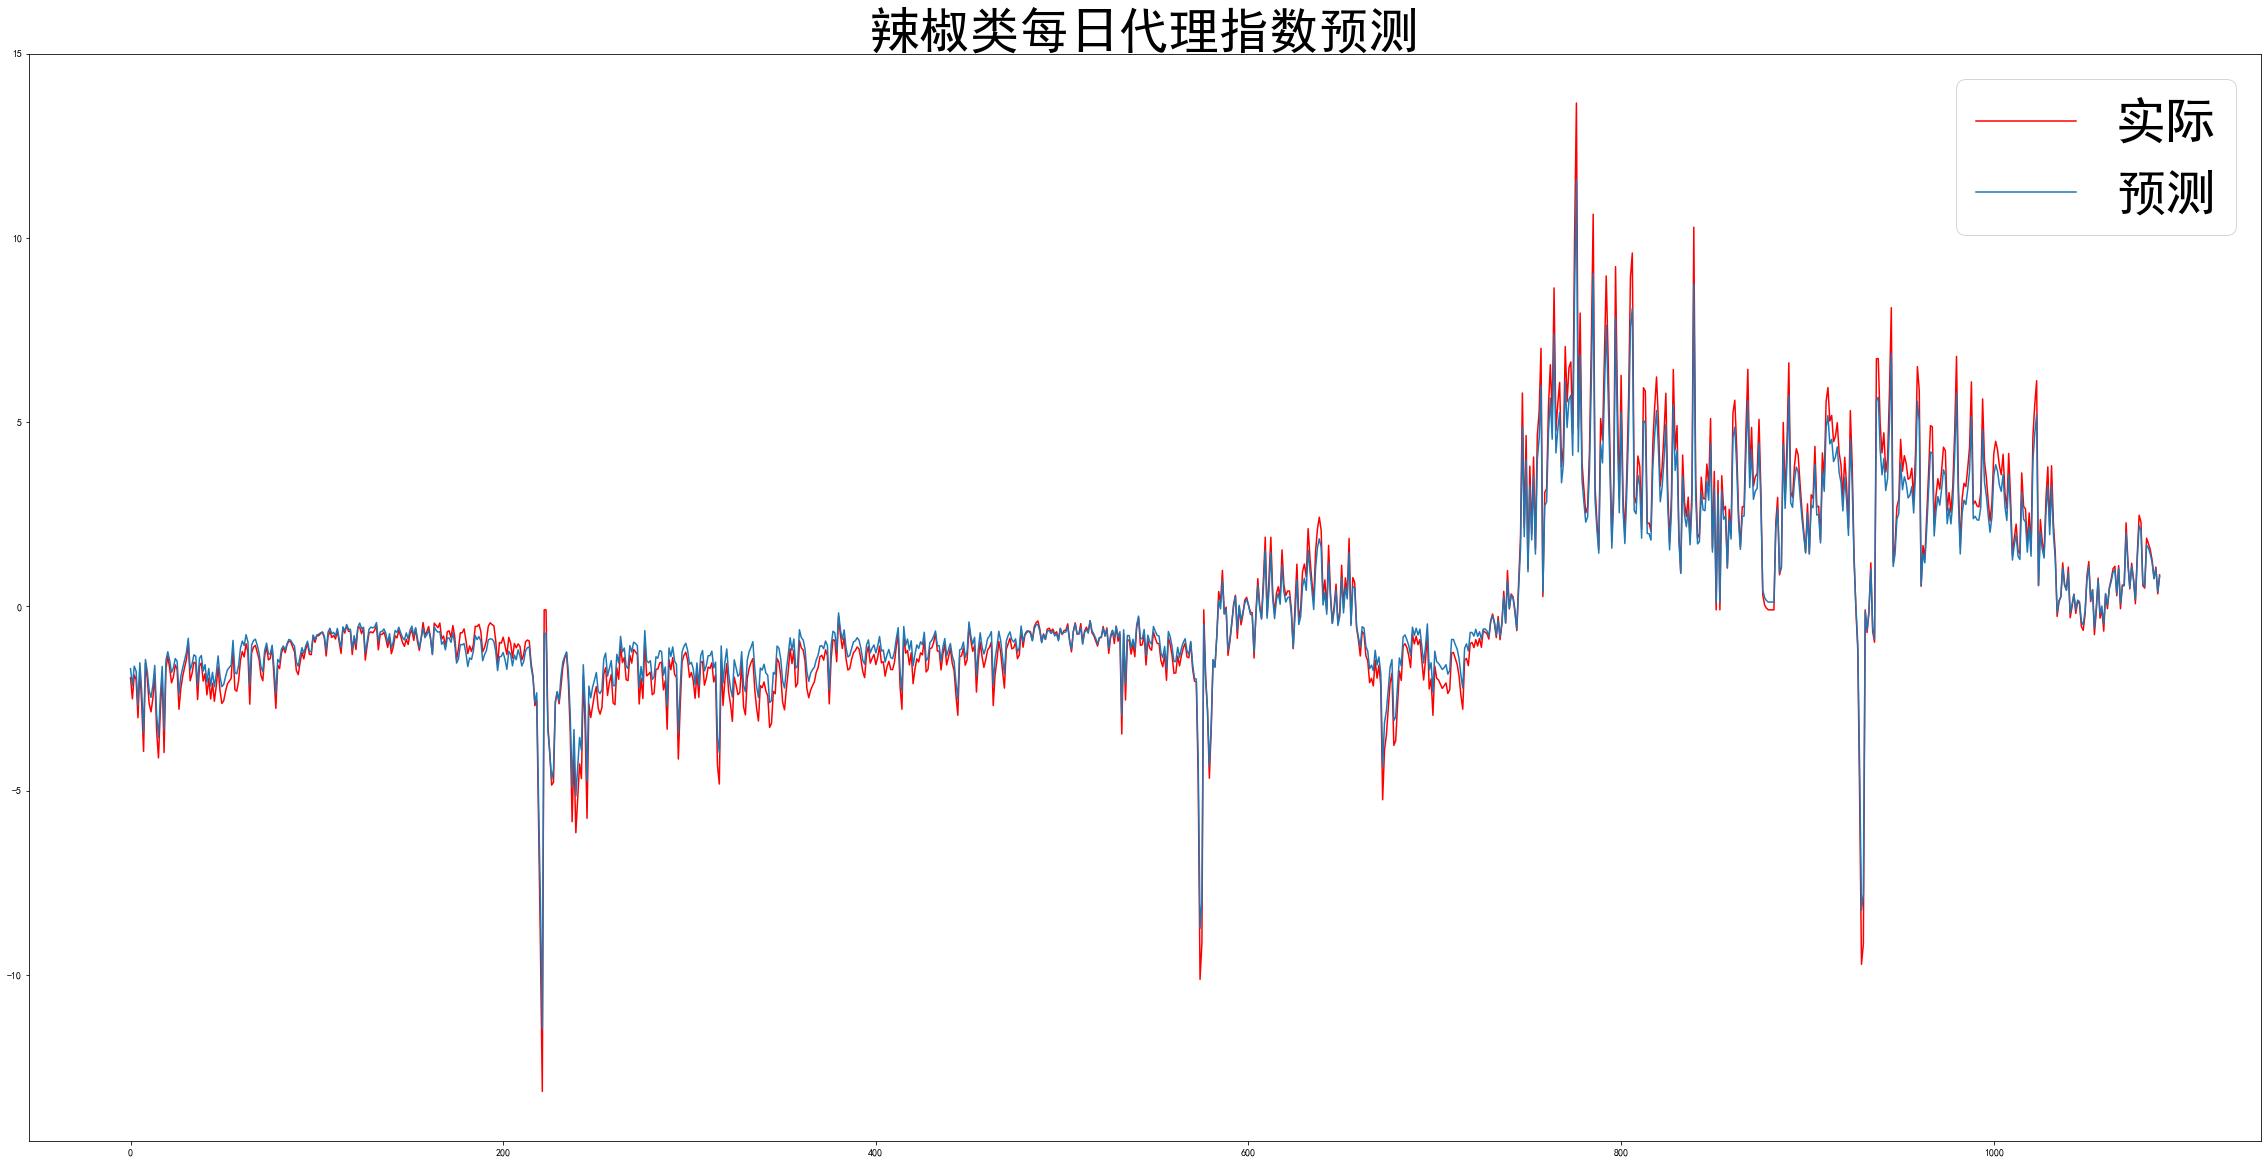

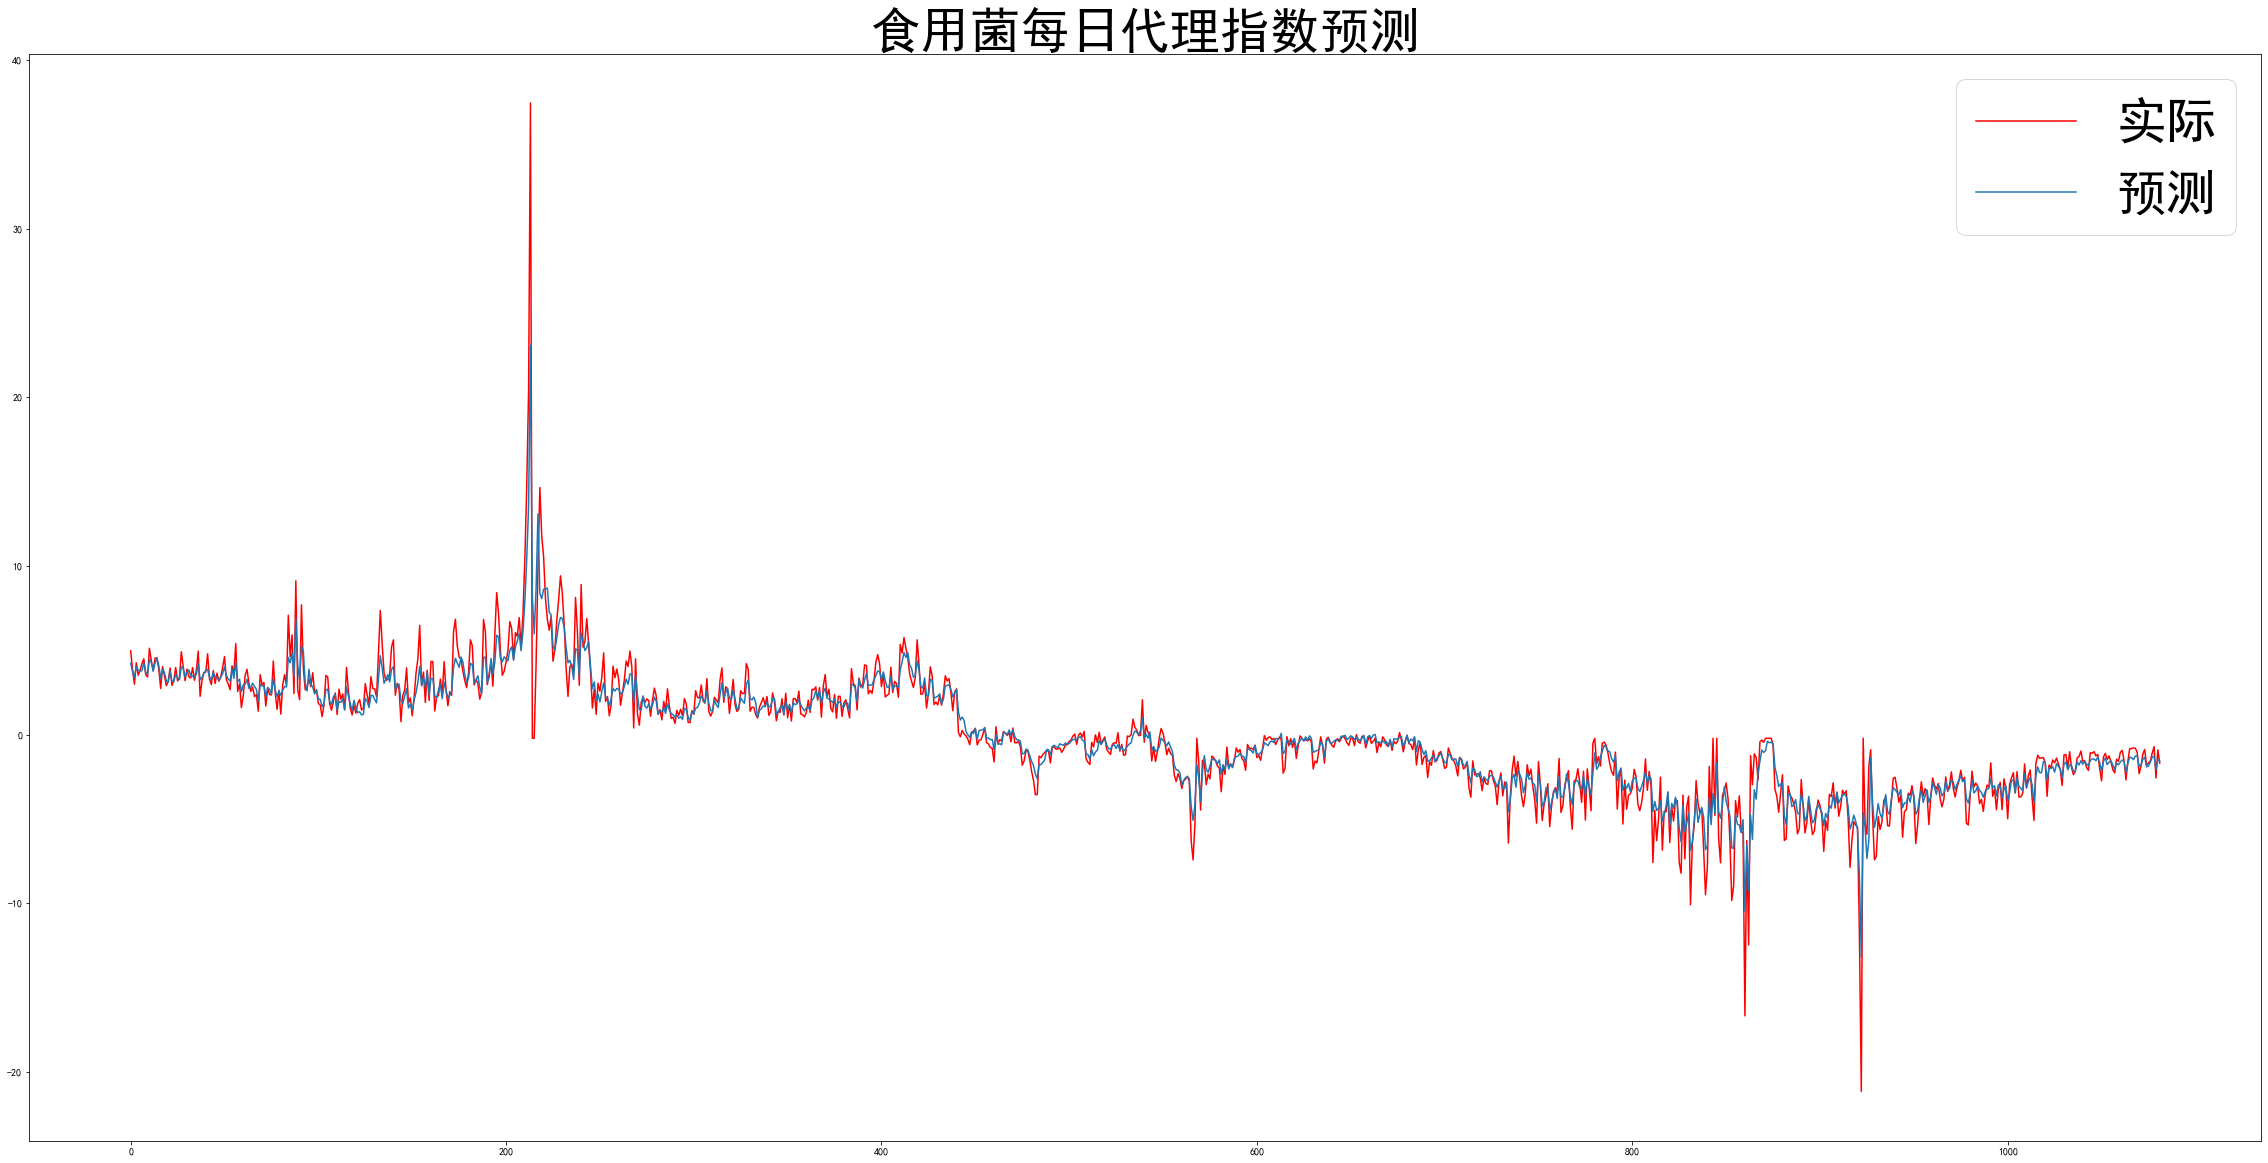

In [96]:
LAG = pd.DataFrame(data = [1,5,5,3,1,5], index =  ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌'] , columns=['lag'])
from statsmodels.tsa.api import VAR
for types in ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']:
    maxlags = LAG.loc[types]['lag']
    VAR_data = []
    VAR_data.append(price[types].values[:-maxlags])
    VAR_data.append(emotion[types].values[maxlags:])
    VAR_data = pd.DataFrame(VAR_data).T
    #print(VAR_data)
    model = VAR(VAR_data)

    results = model.fit(maxlags=maxlags, ic='aic')
    results.summary()


    import matplotlib.pyplot as plt
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    lag_order = results.k_ar
    y1 = []
    y2 = []
    count = 0
    n,m = VAR_data.shape
    # 用i枚举每一天
    for i in range(n-maxlags-1):
        # 制作输入
        forecast_input = VAR_data.values[i:i+maxlags]
        # 往前预测一天
        forecast = results.forecast(forecast_input, steps=1)
        # 将预测结果加入数组中
        y1.append(forecast[0][1])
        # y2中存储的原本的值
        y2.append(VAR_data.values[i+maxlags+1][1])
        # 将两者和阈值进行比较
        if abs(forecast[0][1]-VAR_data.values[i+maxlags+1][1]) < 0.17*1e9:
            count +=1

    # 输出正确率
    #print(count/(n-maxlags))
    plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
    plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
    fig = plt.figure(figsize=(40,20))
    # 手动对齐
    plt.title(types+'每日代理指数预测',fontsize = 50)
    plt.plot(y2[:-2],'r', label = '实际')
    plt.plot(y1[2:],label = '预测')
    plt.legend(fontsize = 50)
    plt.savefig('../data/preLineCharts/'+types+'每日代理指数预测'+'.jpg')
    plt.show()


In [97]:
LAG = pd.DataFrame(data = [1,1,5,1,3,5], index =  ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌'] , columns=['lag'])
price_pre = pd.DataFrame([])
price_pre['销售日期']=pd.date_range(start='2023-07-01', end='2023-07-07', freq='D')
price_pre = price_pre.set_index('销售日期')
from statsmodels.tsa.api import VAR
for types in ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']:
    maxlags = LAG.loc[types]['lag']
    VAR_data = []
    VAR_data.append(emotion[types].values[:-maxlags])
    VAR_data.append(price[types].values[maxlags:])
    VAR_data = pd.DataFrame(VAR_data).T
    #print(VAR_data)
    model = VAR(VAR_data)

    results = model.fit(maxlags=maxlags, ic='aic')
    results.summary()

    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    lag_order = results.k_ar

    count = 0
    n,m = VAR_data.shape
    # 制作输入
    forecast_input = VAR_data.values[-maxlags-1:]
    #print(forecast_input)
    # 往前预测7天
    forecast = results.forecast(forecast_input, steps=7)
    forecast = pd.DataFrame(forecast)[1]
    #print(forecast)
    price_pre[types] = forecast.values
print(price_pre)
price_pre.to_csv('../data/单价未来一周预测.csv',sep=',',encoding='utf_8_sig')

                 花叶类        花菜类      水生根茎类        茄类       辣椒类       食用菌
销售日期                                                                    
2023-07-01  5.121834  11.404573  15.310416  8.185746  6.200762  5.866681
2023-07-02  5.127423  11.300736  14.927829  8.250240  6.242942  5.843455
2023-07-03  5.134766  11.201544  14.971296  8.302904  6.273996  5.912568
2023-07-04  5.143512  11.107201  14.729470  8.346917  6.316383  6.140039
2023-07-05  5.153362  11.017640  14.690847  8.384522  6.356460  6.303946
2023-07-06  5.164061  10.932692  14.581772  8.417308  6.394534  6.321236
2023-07-07  5.175394  10.852146  14.489027  8.446399  6.432550  6.393311


In [98]:
LAG = pd.DataFrame(data = [1,5,5,3,1,5], index =  ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌'] , columns=['lag'])
emotion_pre = pd.DataFrame([])
emotion_pre['销售日期']=pd.date_range(start='2023-07-01', end='2023-07-07', freq='D')
emotion_pre = emotion_pre.set_index('销售日期')
from statsmodels.tsa.api import VAR
for types in ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']:
    maxlags = LAG.loc[types]['lag']
    VAR_data = []
    VAR_data.append(price[types].values[:-maxlags])
    VAR_data.append(emotion[types].values[maxlags:])
    VAR_data = pd.DataFrame(VAR_data).T
    #print(VAR_data)
    model = VAR(VAR_data)

    results = model.fit(maxlags=maxlags, ic='aic')
    results.summary()

    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    lag_order = results.k_ar

    count = 0
    n,m = VAR_data.shape
    # 制作输入
    forecast_input = VAR_data.values[-maxlags-1:]
    #print(forecast_input)
    # 往前预测7天
    forecast = results.forecast(forecast_input, steps=7)
    forecast = pd.DataFrame(forecast)[1]
    #print(forecast)
    emotion_pre[types] = forecast.values
print(emotion_pre)
emotion_pre.to_csv('../data/代理指数未来一周预测.csv',sep=',',encoding='utf_8_sig')

                  花叶类       花菜类     水生根茎类        茄类       辣椒类       食用菌
销售日期                                                                   
2023-07-01 -15.584034 -0.084342 -3.048039 -0.670273  0.521259 -1.500161
2023-07-02 -14.362205 -0.057315 -3.102012 -0.585745  0.533808 -1.439309
2023-07-03 -13.256770 -0.018833 -2.986555 -0.536157  0.541165 -1.602079
2023-07-04 -12.255168  0.012427 -2.991984 -0.490208  0.544334 -1.547500
2023-07-05 -11.346294  0.046291 -2.988456 -0.440305  0.544140 -1.511907
2023-07-06 -10.520324  0.064923 -2.910800 -0.399478  0.541259 -1.616889
2023-07-07  -9.768561  0.081771 -2.870281 -0.362573  0.536248 -1.650780
